# Load checkpoint and imports

In [1]:
import sys
import warnings
warnings.filterwarnings('ignore')
parent_dir = "/Midgard/home/farzantn/phd/Olfaction/MoLFormer_N2024"
sys.path.append(parent_dir)
parent_dir="/Midgard/home/farzantn/mambaforge/envs/MolTran_CUDA11_cuda/lib/python3.8"
sys.path.append(parent_dir)

In [19]:
base_path= '/local_storage/datasets/farzaneh/alignment_olfaction_datasets/'
results_path = 'curated_datasets/dfs_result/'
from utils.util_alignment import set_seeds
from utils.visualization_helper import *  

In [13]:
! ls ../../../../../

@LH-CSC.KTH.SE	dosabel		     jiaruit	micso	     sgerard
@eaDir		eduse		     jmsch	mjorkman     sholk
adhkal		erikeng		     jogela	mklas	     shuche
admin		fanxuan		     jorisv	moerman      shutong
adrianop	farzantn	     jstuart	mohamaj      slurmuser
aghadirzadeh	fedbal		     karef	moletta      soselia
alfredn		federicoprinceofipa  kfriedl	mrabadan     sqama
algc		ferles		     khoche	mwelle	     swestber
amca3		filippao	     kwijk	mzhu	     tarle
amirme		fnorden		     lanzino	nbore	     theow
antonova	fubongodrums	     leonardb	needub	     tibbe
areichlin	fzk		     lfcb	nonar	     vladde
arohlen		galatolo	     liling	okaradag     vlaliadm
arveri		ghad		     linard	okr	     vpolianskii
ashenawa	ghomri		     liyans	oriolcm      wyin
ashibli		glma		     longhini	panesar      yhang
blancacg	gustafte	     lugg	paragk	     yifeid
boyul		haofeil		     lukasfi	paulbp	     yipingx
busching	hazizpour	     maciejw	petteer      yiren
bwichtlhuber	hestell		     mantaadm	qingwen      yiya
carlesbr	h

In [3]:
seed = 2024
set_seeds(seed)
# torch.manual_seed(seed)
# torch.cuda.manual_seed(seed)
# np.random.seed(seed)
# random.seed(seed)
# torch.cuda.manual_seed_all(seed)

In [4]:
times=30
n_components=20

# Helper Methods

In [5]:
# def change_width(ax, new_value) :
#     for patch in ax.patches :
#         current_width = patch.get_width()
#         diff = current_width - new_value
# 
#         # we change the bar width
#         patch.set_width(new_value)
# 
#         # we recenter the bar
#         patch.set_x(patch.get_x() + diff * .5)
# 


In [6]:
# def combine_visualize(df1,df2,df3,tasks,ax,title,type="corr",figure_name="def"):
#     df12 = pd.concat((df1,df2))
#     df_combined =  pd.concat((df12,df3))
#     melted_df_keller = df_combined.melt(id_vars=['model'], var_name='descritpor')
#     
#     # g1.despine(left=True)
#     # g1.set_axis_labels("", title)
#     # g1.legend.set_title("")
#     # g1.set_xticklabels(tasks, rotation=45)
#     if type=="corr":
#         melted_df_keller['value'] = melted_df_keller['value'].abs()
#     else:
#         # melted_df_keller['value'] = melted_df_keller[['value']].apply(np.sqrt)
#         pass
# 
#     print(melted_df_keller.groupby('model')['value'].mean().reset_index())
#     print(melted_df_keller.groupby('model')['value'].sem().reset_index()*2)
#     
#     g1 = sns.barplot(
#     data=melted_df_keller,
#     x="descritpor", y="value", hue="model",
#     errorbar="se",ax=ax,palette=['#4d79a4','#ecc947','#b07aa0'], linewidth=7 )
#     g1.set(xlabel='Model', ylabel=title)
#     g1.spines['top'].set_visible(False)
#     g1.spines['right'].set_visible(False)
#     # g2 = sns.barplot(
#     # data=melted_df_keller,
#     # x="model", y="value",
#     # errorbar="sd", palette="dark", alpha=.6)
#     # g2.despine(left=True)
#     # g2.set_axis_labels("", "Body mass (g)")
#     # g2.legend.set_title("")
#     g1.set_xticklabels(tasks, rotation=90)
#     # change_width(g1, 0.1)
#     # g1.figure.savefig(figure_name+".pdf")
#     return g1

In [7]:
# def combine_visualize_separate(df1,df2,df3,tasks,ax,title,type="corr",figure_name="def"):
#     df12 = pd.concat((df1,df2))
#     df_combined =  pd.concat((df12,df3))
#     melted_df_keller = df_combined.melt(id_vars=['model'], var_name='descritpor')
#     # g1 = sns.catplot(
#     # data=melted_df_keller, kind="bar",
#     # x="descritpor", y="value", hue="model",
#     # errorbar="sd", palette="dark", alpha=.6, height=6,aspect =2 )
#     # g1.despine(left=True)
#     # g1.set_axis_labels("", "Body mass (g)")
#     # g1.legend.set_title("")
#     # g1.set_xticklabels(tasks, rotation=45)
#     if type=="corr":
#         melted_df_keller['value'] = melted_df_keller['value'].abs()
#     else:
#         pass
#         # melted_df_keller['value'] = melted_df_keller[['value']].apply(np.sqrt)
#     print(melted_df_keller.groupby('model')['value'].mean().reset_index())
#     print(melted_df_keller.groupby('model')['value'].sem().reset_index()*2)
#     g2 = sns.barplot(
#     data=melted_df_keller,
#     x="model", y="value",
#     errorbar="se", palette="dark", alpha=.6,ax=ax)
#     # g2.set_axis_labels("", title)
#     g2.set(xlabel='Model', ylabel=title)
#     # g2.despine(left=True)
#     # g2.set_axis_labels("", "Body mass (g)")
#     # g2.legend.set_title("")
#     # g.set_xticklabels(tasks, rotation=45)
#     # g2.figure.savefig(figure_name+".pdf")

In [8]:
# def post_process_dataframe(corrss,msess,df_cor_pom,df_cor_alva,df_mse_pom,df_mse_alva,tasks,figure_name="def"):
#     plt.rcParams["font.size"] = 40
#     corrss_1_12 = corrss.loc[((corrss["layer"]==0) | (corrss["layer"]==12)) & (corrss["model"]=="molformer")]
#     del corrss_1_12["model"]
#     melted_corrss_1_12 = corrss_1_12.melt(id_vars=['layer'], var_name='descritpor')
#     melted_corrss_filtered_increasing=melted_corrss_1_12.groupby('descritpor').filter(lambda x: x.loc[x['layer'] == 12, 'value'].abs().mean() > x.loc[x['layer'] == 0, 'value'].abs().mean())
#     melted_corrss_filtered_decreasing=melted_corrss_1_12.groupby('descritpor').filter(lambda x: x.loc[x['layer'] == 0, 'value'].abs().mean() > x.loc[x['layer'] == 12, 'value'].abs().mean())
# 
#     print(melted_corrss_1_12.descritpor.unique())
# 
#     melted_corrss_filtered_increasing['trend']='Increasing'
#     melted_corrss_filtered_decreasing['trend']='Decreasing'
# 
#     melted_corrss_filtered = pd.concat((melted_corrss_filtered_increasing,melted_corrss_filtered_decreasing))
#     # fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(30,10))
#     # sns.lineplot(
#     # data=melted_corrss_filtered_increasing, x="layer", y="value", hue="descritpor", err_style='bars',ax=ax[0]
#     # )
#     # sns.lineplot(
#     # data=melted_corrss_filtered_decreasing, x="layer", y="value", hue="descritpor", err_style='bars',ax=ax[1]
#     # )
# 
#     # f1, ax_agg = plt.subplots(1, 2,figsize=(20, 5))
#     f2, ax = plt.subplots(2, 1, figsize=(22, 22))
# 
# 
#     
#     
#     # combine_visualize_separate(corrss.loc[corrss["layer"]==12,].iloc[:,corrss.columns != 'layer'], df_cor_pom,df_cor_alva,tasks,ax_agg[0],'Correlation Coefficient',figure_name="Correlation_Avg_"+figure_name)
#     g1=combine_visualize(corrss.loc[corrss["layer"]==12].iloc[:,corrss.columns != 'layer'], df_cor_pom,df_cor_alva,tasks,ax[0],'Correlation Coefficient',figure_name="Correlation_"+figure_name)
# 
# 
# 
#     g1.set_xlabel('')
# 
#    
# 
#     
# 
#     
#     # combine_visualize_separate(msess.loc[msess["layer"]==12].iloc[:,msess.columns != 'layer'], df_mse_pom,df_mse_alva,tasks,ax_agg[1],'MSE',type="mse",figure_name="MSE_Avg_"+figure_name)
#     g2=combine_visualize(msess.loc[msess["layer"]==12].iloc[:,msess.columns != 'layer'], df_mse_pom,df_mse_alva,tasks,ax[1],'NRMSE',type="mse",figure_name="MSE__"+figure_name)
#     g2.set_xlabel('Descriptor')
# 
# 
# 
#     g1.legend().set_title("Model")
#     handles, labels = g1.get_legend_handles_labels()
#     g1.get_legend().remove()
# 
# 
#     g2.legend().set_title("Model")
#     handles, labels = g2.get_legend_handles_labels()
#     g2.get_legend().remove()
#     print(labels)
#     f2.subplots_adjust(bottom=0.2,left=0.1,right=0.95,top=0.95)
#     labels = ['MoLFormer', 'Open-POM', 'DAM']
#     f2.legend(handles, labels, ncol=3, columnspacing=1, prop={'size': 40}, handlelength=1.5, loc="lower center",
#                borderpad=0.3,
#                
#                bbox_to_anchor=(0.52, -0.07), 
#                
#                frameon=True, labelspacing=0.4,handletextpad=0.2,)
# 
# 
#     # plt.legend(title='Smoker', loc='upper left',)
# 
#     plt.subplots_adjust(hspace = 0.6)
# 
#     f2.savefig(figure_name+".pdf", bbox_inches='tight')
#     
#     return melted_corrss_filtered
#     


# Extracting Representations

## Keller

In [16]:
input_file_keller = base_path+'curated_datasets/mols_datasets/curated_keller2016_nona.csv' # or new downloaded file path
df_keller_temp=pd.read_csv(input_file_keller)
keller_tasks= df_keller_temp.columns.to_list()[5:]

In [21]:
# corrs_molfomer,mses_molformer,df_keller_cor_pom,df_keller_mse_pom,df_keller_cor_alva,df_keller_mse_alva =compute_correlation_keller(times , n_components,per_descritor=False)
df_keller_cor_pom=pd.read_csv(base_path+results_path+"df_keller_cor_pom.csv")
df_keller_mse_pom=pd.read_csv(base_path+results_path+"df_keller_mse_pom.csv")
df_keller_cor_alva=pd.read_csv(base_path+results_path+"df_keller_cor_alva.csv")
df_keller_mse_alva=pd.read_csv(base_path+results_path+"df_keller_mse_alva.csv")
df_keller_corrs_molfomer=pd.read_csv(base_path+results_path+"df_keller_corrs_molfomer.csv")
df_keller_mses_molfomer=pd.read_csv(base_path+results_path+"df_keller_mses_molfomer.csv")

In [22]:
def normalize_rmse(df,min_max,j):
    max_values = min_max.max()
    min_values = min_max.min()
    min_max.columns = ['Dataset','Type']+df.columns.values.tolist()[:j]
    # Drop 'Dataset' and 'Type' as they are not numeric columns
    min_values = min_values.drop(['Dataset', 'Type'])
    max_values = max_values.drop(['Dataset', 'Type'])
    for i,col in enumerate(df.columns[:j]):
        df[col] = np.sqrt(df[col]) / (max_values[i] - min_values[i])
    return df



['Acid' 'Ammonia' 'Bakery' 'Burnt' 'Chemical' 'Cold' 'Decayed'
 'Familiarity' 'Fish' 'Flower' 'Fruit' 'Garlic' 'Grass' 'Intensity'
 'Musky' 'Pleasantness' 'Sour' 'Spices' 'Sweaty' 'Sweet' 'Warm' 'Wood']
       model     value
0       alva  0.169007
1  molformer  0.199257
2        pom  0.222965
                model     value
0            alvaalva  0.008903
1  molformermolformer  0.009690
2              pompom  0.010107
       model      value
0       alva  28.518578
1  molformer  28.255086
2        pom  27.846546
                model     value
0            alvaalva  3.780997
1  molformermolformer  3.840804
2              pompom  3.785782
['molformer', 'pom', 'alva']


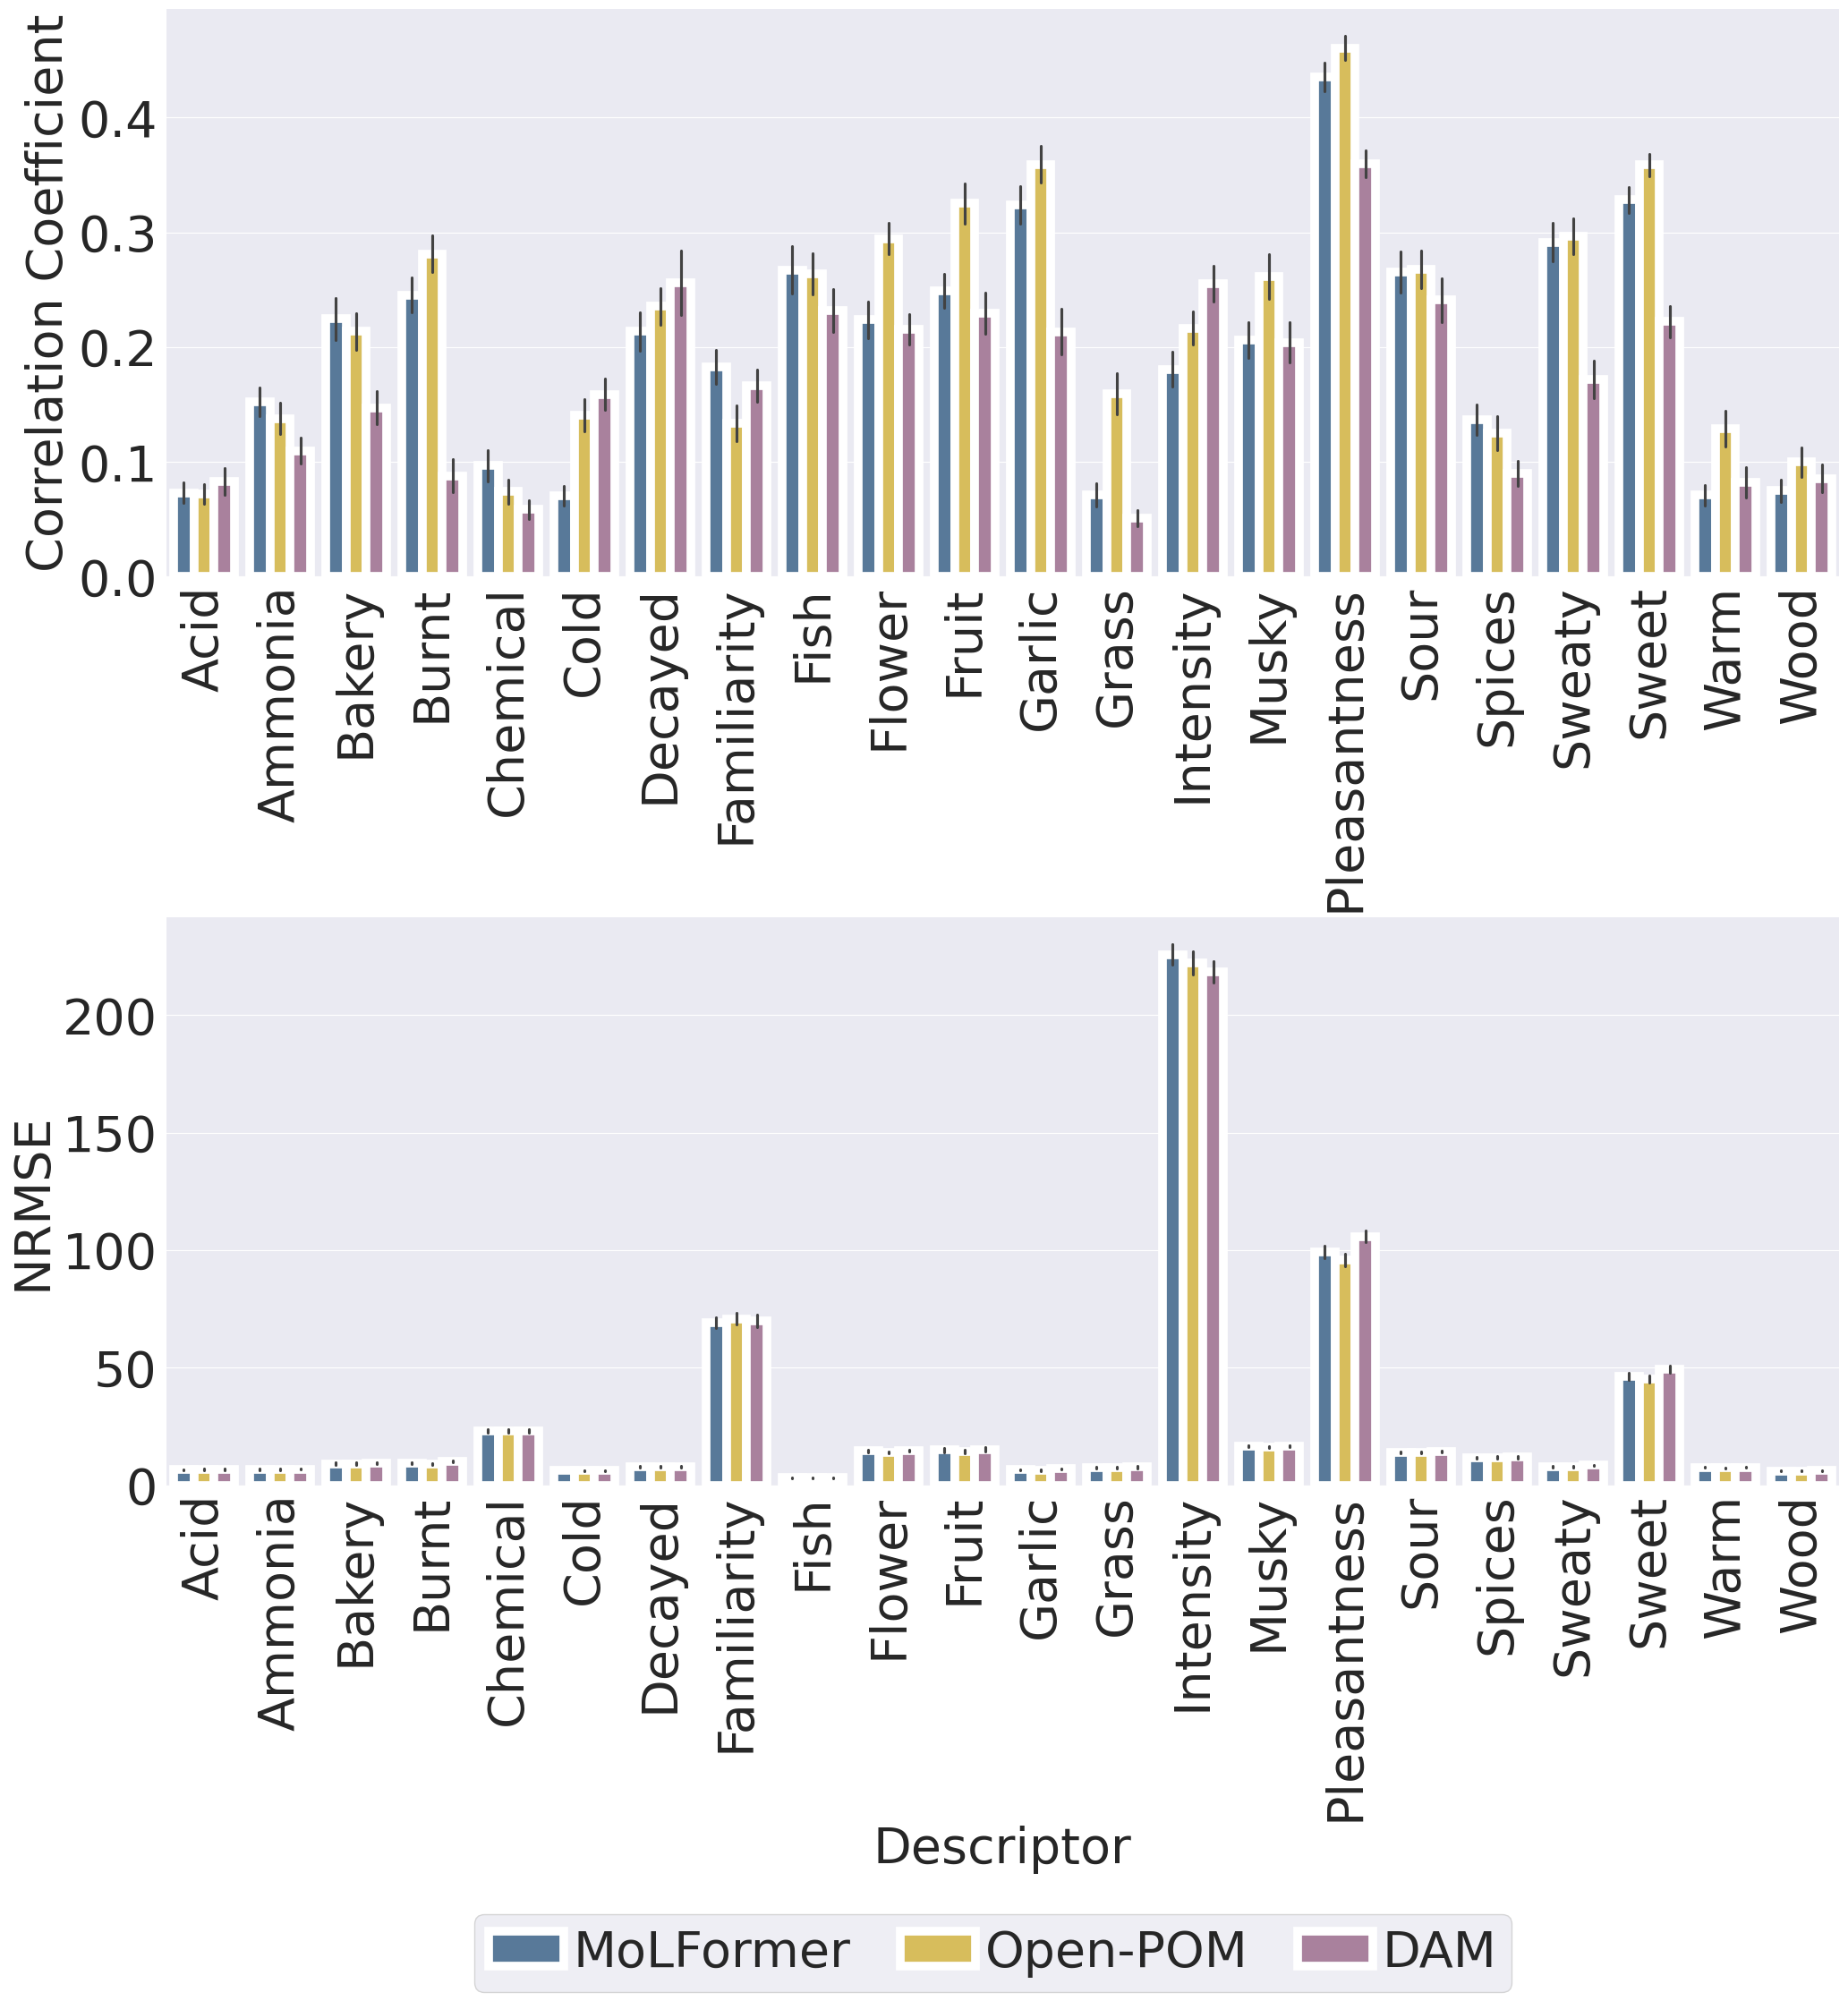

In [24]:
trend_learning_molformer =  post_process_dataframe(df_keller_corrs_molfomer,df_keller_mses_molfomer,df_keller_cor_pom,df_keller_cor_alva,df_keller_mse_pom,df_keller_mse_alva,keller_tasks,"keller_regression")
trend_learning_molformer['dataset']='keller'

 Sagar

In [26]:
input_file_sagar = base_path+'/curated_datasets/mols_datasets/curated_sagar_subjects_nonaminus.csv' # or new downloaded file path
df_sagar_temp=pd.read_csv(input_file_sagar)
sagar_tasks= df_sagar_temp.columns.to_list()[1:-5]

In [27]:
# corrs_molfomer,mses_molformer,df_keller_cor_pom,df_keller_mse_pom,df_keller_cor_alva,df_keller_mse_alva =compute_correlation_keller(times , n_components,per_descritor=False)
df_sagar_cor_pom=pd.read_csv(base_path+results_path+"df_sagar_cor_pom.csv")
df_sagar_mse_pom=pd.read_csv(base_path+results_path+"df_sagar_mse_pom.csv")
df_sagar_cor_alva=pd.read_csv(base_path+results_path+"df_sagar_cor_alva.csv")
df_sagar_mse_alva=pd.read_csv(base_path+results_path+"df_sagar_mse_alva.csv")
df_sagar_corrs_molfomer=pd.read_csv(base_path+results_path+"df_sagar_corrs_molfomer.csv")
df_sagar_mses_molfomer=pd.read_csv(base_path+results_path+"df_sagar_mses_molfomer.csv")

['Intensity' 'Pleasantness' 'Fishy' 'Burnt' 'Sour' 'Decayed' 'Musky'
 'Fruity' 'Sweaty' 'Cool' 'Floral' 'Sweet' 'Warm' 'Bakery' 'Spicy']
       model     value
0       alva  0.349057
1  molformer  0.249381
2        pom  0.287169
                model     value
0            alvaalva  0.013717
1  molformermolformer  0.013735
2              pompom  0.014820
       model     value
0       alva  0.064994
1  molformer  0.081843
2        pom  0.079137
                model     value
0            alvaalva  0.001903
1  molformermolformer  0.002599
2              pompom  0.002435
['molformer', 'pom', 'alva']


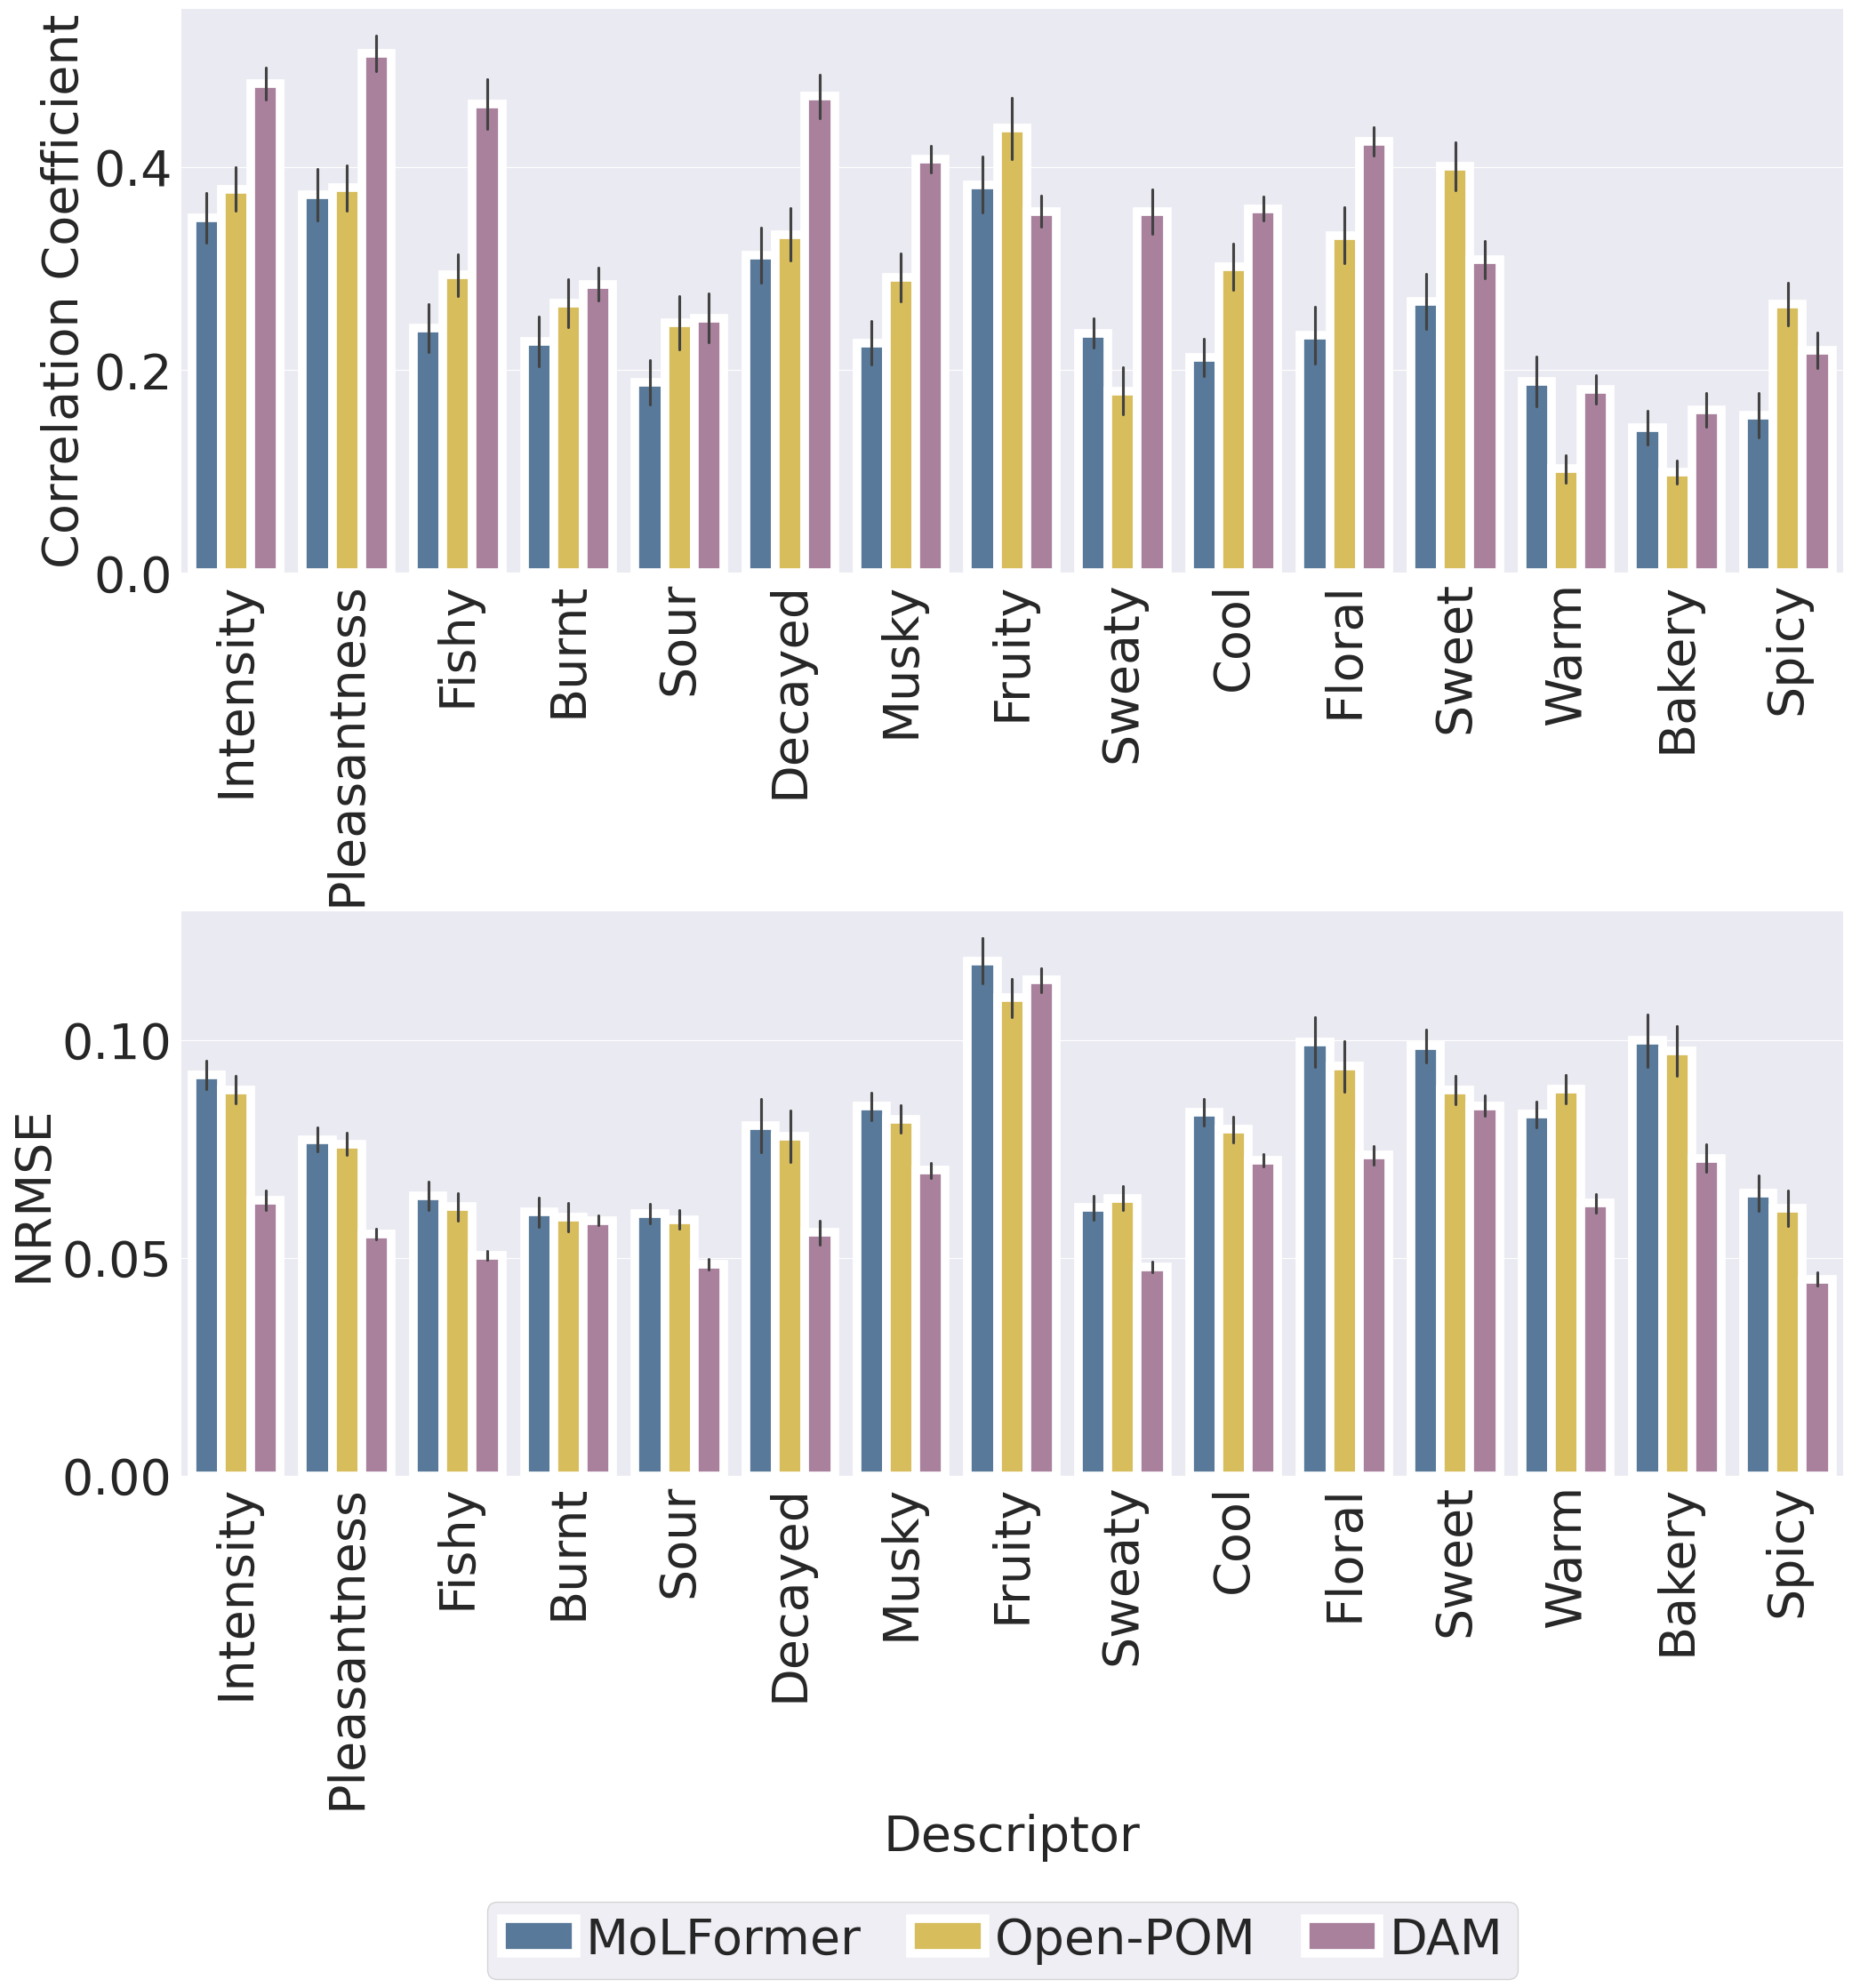

In [28]:
trend_learning_molformer_sagar = post_process_dataframe(df_sagar_corrs_molfomer,df_sagar_mses_molfomer,df_sagar_cor_pom,df_sagar_cor_alva,df_sagar_mse_pom,df_sagar_mse_alva,sagar_tasks,"sagar_regression")